In [26]:
'''
Example implementations of HARK.ConsumptionSaving.ConsPortfolioModel
'''
from HARK.ConsumptionSaving.ConsPortfolioModel import PortfolioConsumerType, init_portfolio
from HARK.ConsumptionSaving.ConsIndShockModel import init_lifecycle
from HARK.utilities import plotFuncs
from copy import copy
from time import time
import numpy as np
import matplotlib.pyplot as plt

In [27]:
init_portfolio['LivPrb']

[0.98]

In [28]:
# Make and solve an example portfolio choice consumer type
print('Now solving an example portfolio choice problem; this might take a moment...')
MyType = PortfolioConsumerType()
MyType.cycles = 0
t0 = time()
MyType.solve()
t1 = time()
MyType.cFunc = [MyType.solution[t].cFuncAdj for t in range(MyType.T_cycle)]
MyType.ShareFunc = [MyType.solution[t].ShareFuncAdj for t in range(MyType.T_cycle)]
print('Solving an infinite horizon portfolio choice problem took ' + str(t1-t0) + ' seconds.')

Now solving an example portfolio choice problem; this might take a moment...
Solving an infinite horizon portfolio choice problem took 14.559027910232544 seconds.


In [29]:
len(MyType.solution)

1

In [30]:
# Compute the Merton-Samuelson limiting portfolio share when returns are lognormal
MyType.RiskyVar = MyType.RiskyStd**2
MyType.RiskPrem = MyType.RiskyAvg - MyType.Rfree
def RiskyShareMertSamLogNormal(RiskPrem,CRRA,RiskyVar):
    return RiskPrem/(CRRA*RiskyVar)

Consumption function over market resources:


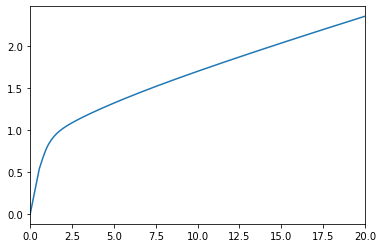

Risky asset share as a function of market resources:
Optimal (blue) versus Theoretical Limit (orange)


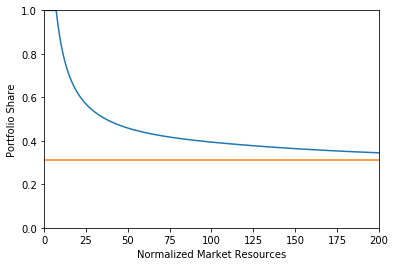

In [31]:
# Plot the consumption and risky-share functions
print('Consumption function over market resources:')
plotFuncs(MyType.cFunc[0], 0., 20.)
print('Risky asset share as a function of market resources:')
print('Optimal (blue) versus Theoretical Limit (orange)')
plt.xlabel('Normalized Market Resources')
plt.ylabel('Portfolio Share')
plt.ylim(0.0,1.0)
# Since we are using a discretization of the lognormal distribution,
# the limit is numerically computed and slightly different from 
# the analytical limit obtained by Merton and Samuelson for infinite wealth
plotFuncs([MyType.ShareFunc[0]
#           ,lambda m: RiskyShareMertSamLogNormal(MyType.RiskPrem,MyType.CRRA,MyType.RiskyVar)*np.ones_like(m)
           ,lambda m: MyType.ShareLimit*np.ones_like(m)
          ] , 0., 200.)

In [32]:
# Now simulate this consumer type
MyType.track_vars = ['cNrmNow', 'ShareNow', 'aNrmNow', 't_age']
MyType.T_sim = 100
MyType.initializeSim()
MyType.simulate()

In [33]:
print('\n\n\n')
print('For derivation of the numerical limiting portfolio share')
print('as market resources approach infinity, see')
print('http://www.econ2.jhu.edu/people/ccarroll/public/lecturenotes/AssetPricing/Portfolio-CRRA/')





For derivation of the numerical limiting portfolio share
as market resources approach infinity, see
http://www.econ2.jhu.edu/people/ccarroll/public/lecturenotes/AssetPricing/Portfolio-CRRA/


In [34]:
""
# Make another example type, but this one optimizes risky portfolio share only
# on the discrete grid of values implicitly chosen by RiskyCount, using explicit
# value maximization.
init_discrete_share = init_portfolio.copy()
init_discrete_share['DiscreteShareBool'] = True
init_discrete_share['vFuncBool'] = True # Have to actually construct value function for this to work

In [35]:
# Make and solve a discrete portfolio choice consumer type
print('Now solving a discrete choice portfolio problem; this might take a minute...')
DiscreteType = PortfolioConsumerType(**init_discrete_share)
DiscreteType.cycles = 0
t0 = time()
DiscreteType.solve()
t1 = time()
DiscreteType.cFunc = [DiscreteType.solution[t].cFuncAdj for t in range(DiscreteType.T_cycle)]
DiscreteType.ShareFunc = [DiscreteType.solution[t].ShareFuncAdj for t in range(DiscreteType.T_cycle)]
print('Solving an infinite horizon discrete portfolio choice problem took ' + str(t1-t0) + ' seconds.')

Now solving a discrete choice portfolio problem; this might take a minute...
Solving an infinite horizon discrete portfolio choice problem took 29.52482008934021 seconds.


Consumption function over market resources:


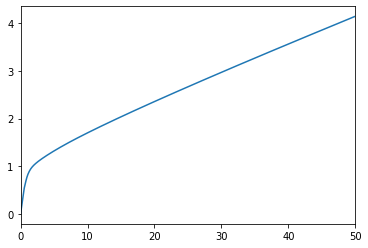

Risky asset share as a function of market resources:
Optimal (blue) versus Theoretical Limit (orange)


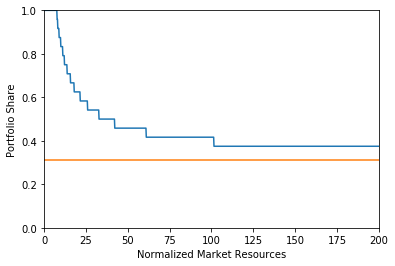

In [36]:
# Plot the consumption and risky-share functions
print('Consumption function over market resources:')
plotFuncs(DiscreteType.cFunc[0], 0., 50.)
print('Risky asset share as a function of market resources:')
print('Optimal (blue) versus Theoretical Limit (orange)')
plt.xlabel('Normalized Market Resources')
plt.ylabel('Portfolio Share')
plt.ylim(0.0,1.0)
# Since we are using a discretization of the lognormal distribution,
# the limit is numerically computed and slightly different from 
# the analytical limit obtained by Merton and Samuelson for infinite wealth
plotFuncs([DiscreteType.ShareFunc[0]
           ,lambda m: DiscreteType.ShareLimit*np.ones_like(m)
          ] , 0., 200.)

In [14]:
print('\n\n\n')

In [37]:
""
# Make another example type, but this one can only update their risky portfolio
# share in any particular period with 15% probability.
init_sticky_share = init_portfolio.copy()
init_sticky_share['AdjustPrb'] = 0.15

In [38]:
# Make and solve a discrete portfolio choice consumer type
print('Now solving a portfolio choice problem with "sticky" portfolio shares; this might take a moment...')
StickyType = PortfolioConsumerType(**init_sticky_share)
StickyType.cycles = 0
t0 = time()
StickyType.solve()
t1 = time()
StickyType.cFuncAdj = [StickyType.solution[t].cFuncAdj for t in range(StickyType.T_cycle)]
StickyType.cFuncFxd = [StickyType.solution[t].cFuncFxd for t in range(StickyType.T_cycle)]
StickyType.ShareFunc = [StickyType.solution[t].ShareFuncAdj for t in range(StickyType.T_cycle)]
print('Solving an infinite horizon sticky portfolio choice problem took ' + str(t1-t0) + ' seconds.')

Now solving a portfolio choice problem with "sticky" portfolio shares; this might take a moment...
Solving an infinite horizon sticky portfolio choice problem took 41.86589789390564 seconds.


Consumption function over market resources when the agent can adjust his portfolio:


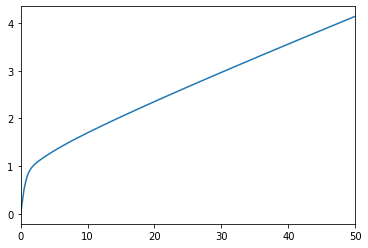

In [39]:
# Plot the consumption and risky-share functions
print('Consumption function over market resources when the agent can adjust his portfolio:')
plotFuncs(StickyType.cFuncAdj[0], 0., 50.)

Consumption function over market resources when the agent CAN'T adjust, by current share:


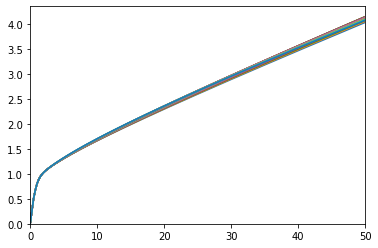

In [46]:
print("Consumption function over market resources when the agent CAN'T adjust, by current share:")
M = np.linspace(0., 50., 200)
for s in np.linspace(0.,1.,21):
    C = StickyType.cFuncFxd[0](M, s*np.ones_like(M))
    plt.plot(M,C)
plt.xlim(0.,50.)
plt.ylim(0.,None)
plt.show()

Risky asset share function over market resources (when possible to adjust):
Optimal (blue) versus Theoretical Limit (orange)


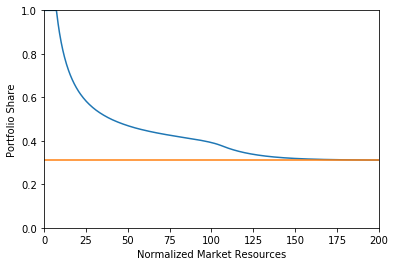

In [18]:
print('Risky asset share function over market resources (when possible to adjust):')
print('Optimal (blue) versus Theoretical Limit (orange)')
plt.xlabel('Normalized Market Resources')
plt.ylabel('Portfolio Share')
plt.ylim(0.0,1.0)
plotFuncs([StickyType.ShareFunc[0]
           ,lambda m: StickyType.ShareLimit*np.ones_like(m)
          ] , 0., 200.)

In [19]:
""
# Make another example type, but this one has *age-varying* perceptions of risky asset returns.
# Begin by making a lifecycle dictionary, but adjusted for the portfolio choice model.
init_age_varying_risk_perceptions = copy(init_lifecycle)
init_age_varying_risk_perceptions['RiskyCount']      = init_portfolio['RiskyCount']
init_age_varying_risk_perceptions['ShareCount']      = init_portfolio['ShareCount']
init_age_varying_risk_perceptions['aXtraMax']        = init_portfolio['aXtraMax']
init_age_varying_risk_perceptions['aXtraCount']      = init_portfolio['aXtraCount']
init_age_varying_risk_perceptions['aXtraNestFac']    = init_portfolio['aXtraNestFac']
init_age_varying_risk_perceptions['BoroCnstArt']     = init_portfolio['BoroCnstArt']
init_age_varying_risk_perceptions['CRRA']            = init_portfolio['CRRA']
init_age_varying_risk_perceptions['DiscFac']         = init_portfolio['DiscFac']

In [20]:
init_age_varying_risk_perceptions['RiskyAvg']        = 10*[1.08]
init_age_varying_risk_perceptions['RiskyStd']        = [0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29]
init_age_varying_risk_perceptions['RiskyAvgTrue']    = 1.08
init_age_varying_risk_perceptions['RiskyStdTrue']    = 0.20
AgeVaryingRiskPercType = PortfolioConsumerType(**init_age_varying_risk_perceptions)
AgeVaryingRiskPercType.cycles = 1

In [21]:
# Solve the agent type with age-varying risk perceptions
print('Now solving a portfolio choice problem with age-varying risk perceptions...')
t0 = time()
AgeVaryingRiskPercType.solve()
AgeVaryingRiskPercType.cFunc = [AgeVaryingRiskPercType.solution[t].cFuncAdj for t in range(AgeVaryingRiskPercType.T_cycle)]
AgeVaryingRiskPercType.ShareFunc = [AgeVaryingRiskPercType.solution[t].ShareFuncAdj for t in range(AgeVaryingRiskPercType.T_cycle)]
t1 = time()
print('Solving a ' + str(AgeVaryingRiskPercType.T_cycle) + ' period portfolio choice problem with age-varying risk perceptions took ' + str(t1-t0) + ' seconds.')

Now solving a portfolio choice problem with age-varying risk perceptions...
Solving a 10 period portfolio choice problem with age-varying risk perceptions took 0.640496015548706 seconds.


Consumption function over market resources in each lifecycle period:


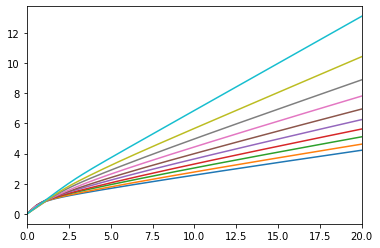

Risky asset share function over market resources in each lifecycle period:


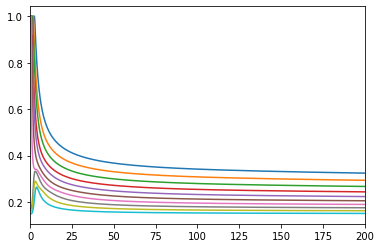

In [20]:
# Plot the consumption and risky-share functions
print('Consumption function over market resources in each lifecycle period:')
plotFuncs(AgeVaryingRiskPercType.cFunc, 0., 20.)
print('Risky asset share function over market resources in each lifecycle period:')
plotFuncs(AgeVaryingRiskPercType.ShareFunc, 0., 200.)

The code below tests the mathematical limits of the model.

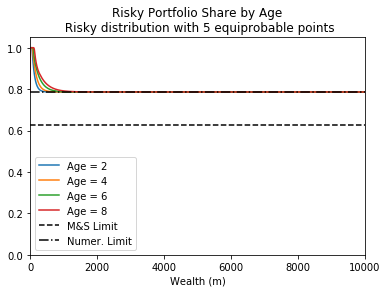

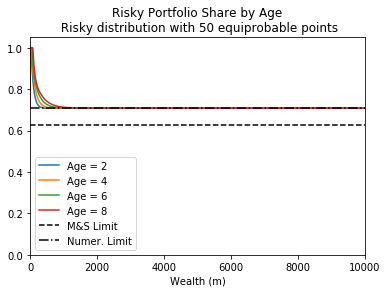

In [49]:
import os

# They assume its a polinomial of age. Here are the coefficients
a=-2.170042+2.700381
b1=0.16818
b2=-0.0323371/10
b3=0.0019704/100

time_params = {'Age_born': 0, 'Age_retire': 8, 'Age_death': 9}
t_start = time_params['Age_born']
t_ret   = time_params['Age_retire'] # We are currently interpreting this as the last period of work
t_end   = time_params['Age_death']

# They assume retirement income is a fraction of labor income in the
# last working period
repl_fac = 0.68212

# Compute average income at each point in (working) life
f = np.arange(t_start, t_ret+1,1)
f = a + b1*f + b2*(f**2) + b3*(f**3)
det_work_inc = np.exp(f)

# Retirement income
det_ret_inc = repl_fac*det_work_inc[-1]*np.ones(t_end - t_ret)

# Get a full vector of the deterministic part of income
det_income = np.concatenate((det_work_inc, det_ret_inc))

# ln Gamma_t+1 = ln f_t+1 - ln f_t
gr_fac = np.exp(np.diff(np.log(det_income)))

# Now we have growth factors for T_end-1 periods.

# Finally define the normalization factor used by CGM, for plots.
# ### IMPORTANT ###
# We adjust this normalization factor for what we believe is a typo in the
# original article. See the REMARK jupyter notebook for details.
norm_factor = det_income * np.exp(0)

# Create a grid of market resources for the plots
    
mMin = 0    # Minimum ratio of assets to income to plot
mMax = 1e4 # Maximum ratio of assets to income to plot
mPts = 1000 # Number of points to plot 

eevalgrid = np.linspace(0,mMax,mPts) # range of values of assets for the plot

# Number of points that will be used to approximate the risky distribution
risky_count_grid = [5,50]


# %% Calibration and solution

for rcount in risky_count_grid:
    
    # Create a new dictionary and replace the number of points that
    # approximate the risky return distribution
    
    # Create new dictionary
    merton_dict = init_lifecycle.copy()
    merton_dict['RiskyCount'] = rcount

    # Create and solve agent
    agent = PortfolioConsumerType(**merton_dict)
    agent.solve()

    # Compute the analytical Merton-Samuelson limiting portfolio share
    RiskyVar = agent.RiskyStd**2
    RiskPrem = agent.RiskyAvg - agent.Rfree
    MS_limit = RiskyShareMertSamLogNormal(RiskPrem,
                                          agent.CRRA,
                                          RiskyVar)
    
    # Now compute the limiting share numerically, using the approximated
    # distribution
    agent.updateShareLimit()
    NU_limit = agent.ShareLimit
    
    # Plot by ages
    ages = [2, 4, 6, 8]
    age_born = time_params['Age_born']
    plt.figure()
    for a in ages:
        plt.plot(eevalgrid,
                 agent.solution[a-age_born]\
                 .ShareFuncAdj(eevalgrid/
                               norm_factor[a-age_born]),
                 label = 'Age = %i' %(a))
        
    plt.axhline(MS_limit, c='k', ls='--', label = 'M&S Limit')
    plt.axhline(NU_limit, c='k', ls='-.', label = 'Numer. Limit')

    plt.ylim(0,1.05)
    plt.xlim(eevalgrid[0],eevalgrid[-1])
    plt.legend()
    plt.title('Risky Portfolio Share by Age\n Risky distribution with {points} equiprobable points'.format(points = rcount))
    plt.xlabel('Wealth (m)')

    plt.ioff()
    plt.draw()


In [8]:
merton_dict['tax_rate']

0.0